### (a) FCN on Cifar-10 using NTK lib

In [8]:
# load data

import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)

# label_map = {"dog": 5, "cat": 3}
dog_cat_train = [trainset[i][1] == 5 or trainset[i][1] == 3 for i in range(len(trainset))]
dog_cat_test = [testset[i][1] == 5 or testset[i][1] == 3 for i in range(len(testset))]


train = trainset.data[dog_cat_train]
train_label = np.array(trainset.targets)[dog_cat_train]
test = testset.data[dog_cat_test]
test_label = np.array(testset.targets)[dog_cat_test]

# flatten 
X_train = train.reshape(train.shape[0], -1)
X_test = test.reshape(test.shape[0], -1)

# Reshape labels
Y_train = train_label.reshape(train_label.shape[0], -1)
Y_test = test_label.reshape(test_label.shape[0])

Files already downloaded and verified
Files already downloaded and verified


In [10]:
# solve NTK 

import neural_tangents as nt
from neural_tangents import stax
import time

K = [1, 3, 5, 7]
accus = []
for k in K:
    start = time.time()
    layers = []
    for _ in range(k):
        layers += [stax.Dense(3072), stax.Relu()]
        layers += [stax.Dense(1)]

    _, _, kernel_fn = stax.serial(*layers)

    predict_fn = nt.predict.gradient_descent_mse_ensemble(kernel_fn, 
                                                          X_train,
                                                          Y_train)

    Y_test_pred = predict_fn(x_test=X_test, get='ntk')
    Y_test_pred = [5 if i > 4 else 3 for i in Y_test_pred] # re-label as integer

    accu = np.sum(Y_test_pred == Y_test) / len(Y_test)
    accus.append(accu)

    print("k: ", k ," accu: ", accu)

k:  1  accu:  0.638
k:  3  accu:  0.637
k:  5  accu:  0.6405
k:  7  accu:  0.642


Text(0, 0.5, 'accu')

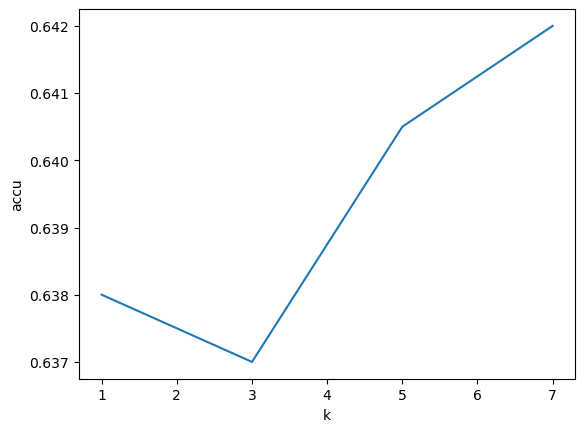

In [13]:
import matplotlib.pyplot as plt    
plt.plot(K, accus)
plt.xlabel('k')
plt.ylabel('accu')

### (b) Using LeakyReLU

In [21]:
# solve NTK 

import neural_tangents as nt
from neural_tangents import stax
import time

K = [1, 3, 5, 7]
accus = []
for k in K:
    start = time.time()
    layers = []
    for _ in range(k):
        layers += [stax.Dense(3072), stax.LeakyRelu(alpha=0.01)]
        layers += [stax.Dense(1)]

    _, _, kernel_fn = stax.serial(*layers)

    predict_fn = nt.predict.gradient_descent_mse_ensemble(kernel_fn, 
                                                          X_train,
                                                          Y_train)

    Y_test_pred = predict_fn(x_test=X_test, get='ntk')
    Y_test_pred = [5 if i > 4 else 3 for i in Y_test_pred] # re-label as integer

    accu = np.sum(Y_test_pred == Y_test) / len(Y_test)
    accus.append(accu)

    print("k: ", k ," accu: ", accu)

k:  1  accu:  0.638
k:  3  accu:  0.637
k:  5  accu:  0.6405
k:  7  accu:  0.641


Text(0, 0.5, 'accu')

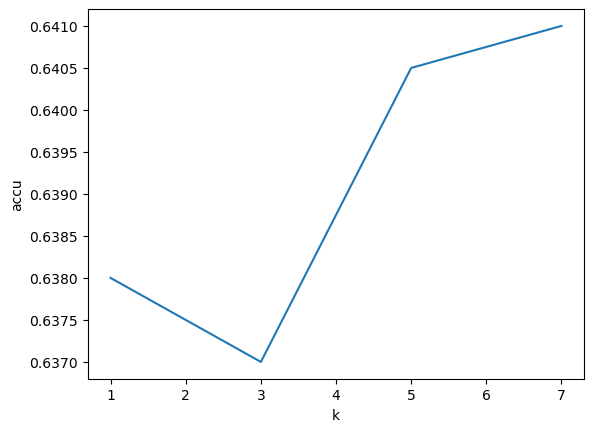

In [23]:
import matplotlib.pyplot as plt    
plt.plot(K, accus)
plt.xlabel('k')
plt.ylabel('accu')